  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
No Null or Nan
       Country         Year  Life expectancy at birth 

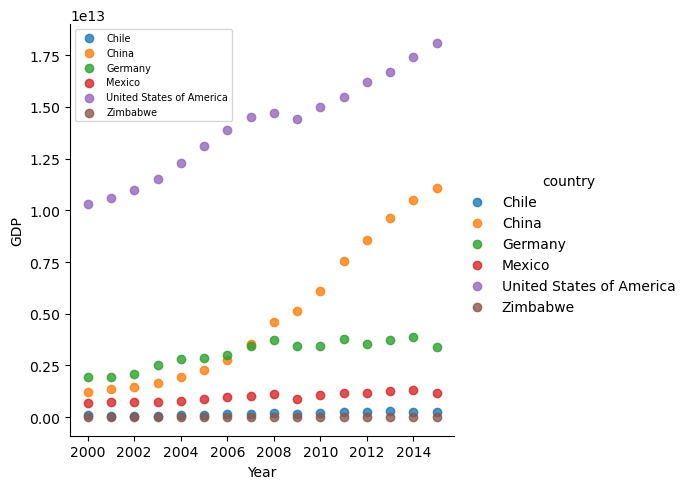

<Figure size 640x480 with 0 Axes>

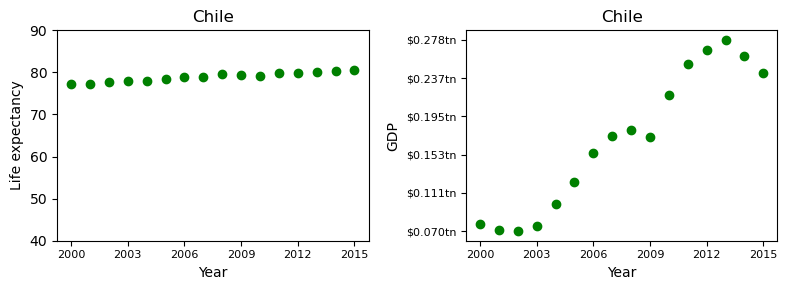

<Figure size 640x480 with 0 Axes>

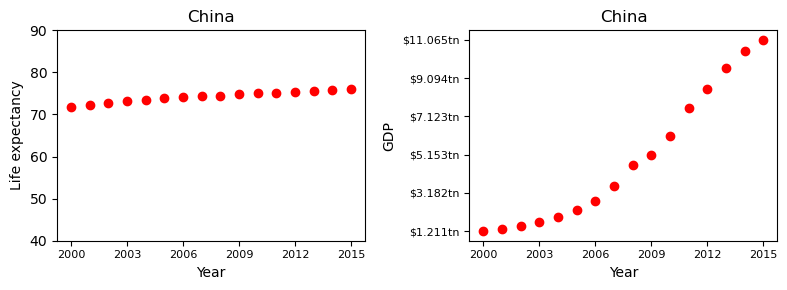

<Figure size 640x480 with 0 Axes>

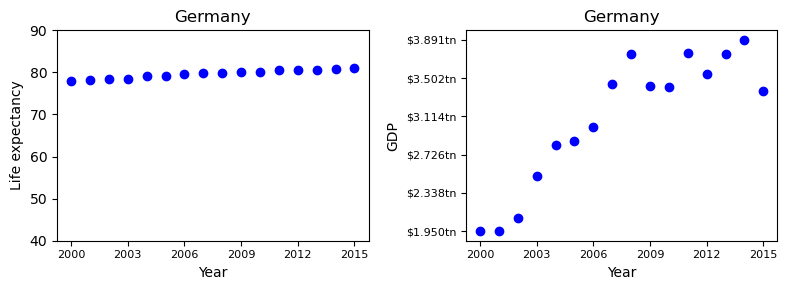

<Figure size 640x480 with 0 Axes>

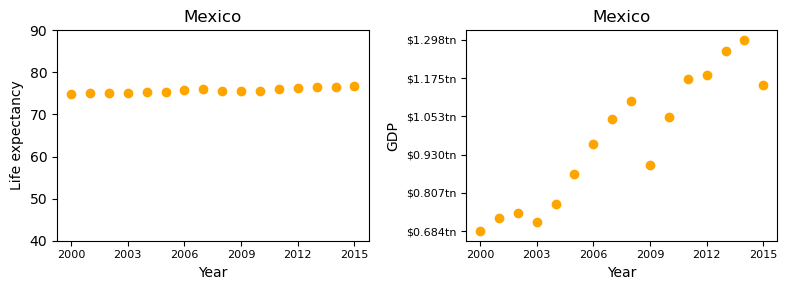

<Figure size 640x480 with 0 Axes>

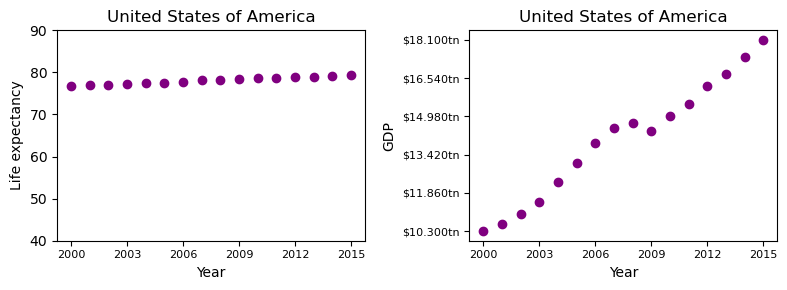

<Figure size 640x480 with 0 Axes>

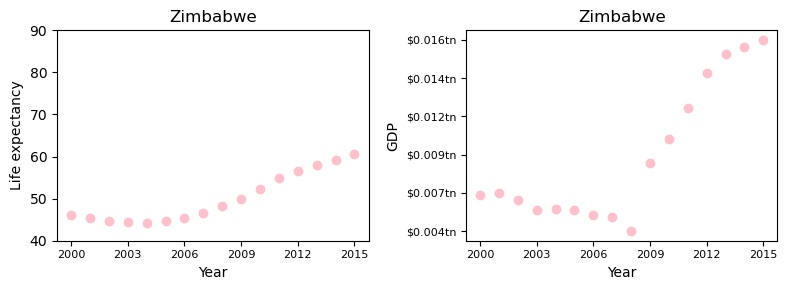

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

gdp_df = pd.read_csv('all_data.csv')
print(gdp_df.head())
print(gdp_df.info())
contains_nan = gdp_df.isna().any().any()
contains_null = gdp_df.isnull().any().any()
if contains_null:
    print('Yes Null')
elif contains_nan:
    print('Yes Nan')
else:
    print('No Null or Nan')
    
# All data is accounted for, no nan or null values.

print(gdp_df.describe(include='all'))

# Convert columns to lowercase/shorthand names for ease of access

for column in gdp_df.columns:
    if column == 'Life expectancy at birth (years)':
        gdp_df.rename(columns={column: 'life_expect'}, inplace=True)
    else:
        gdp_df.rename(columns={column: column.lower()}, inplace=True)
        
# Create more readable values for numbers in the billion/trillions

gdp_df['GDP_in_trillions'] = ['${:.3f}tn'.format(x/10**12) for x in gdp_df['gdp']]

print(gdp_df['GDP_in_trillions'].head())
                                                # Plot all countries based on GDP
country_list = gdp_df.country.unique().tolist() 
sns.lmplot(x='year', y='gdp', hue ='country', data=gdp_df, fit_reg=False)
plt.legend(country_list, fontsize=7)
plt.xlabel('Year')
plt.ylabel('GDP')

plt.show()
plt.clf()
gdp_len = range(1000000000000, 17100000000000, 1800000000000)
age_len = list(range(40, 100, 10))
year_len = list(range(2000, 2016, 3))
color_sample = ['green', 'red', 'blue', 'orange', 'purple', 'pink']
country_list = gdp_df.country.unique().tolist() 

# Creating a for loop to display scatterplot comparison of GDP and Life expectancy

for i, country in enumerate(country_list):
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    ax1 = axs[0]
    ax2 = axs[1]
    country_gdp = gdp_df[gdp_df.country == country]

    ax1.scatter(x='year', y='life_expect', data=country_gdp, color=color_sample[i])
    ax1.set_title(country)
    ax1.set_ylabel('Life expectancy')
    ax1.set_xlabel('Year')
    ax1.set_xticks(year_len)
    ax1.set_yticks(age_len)
    ax1.set_xticklabels(labels=country_gdp.year[0:16:3], fontsize=8)
    
    max_gdp = int(np.max(country_gdp.gdp))
    min_gdp = int(np.min(country_gdp.gdp))
    country_gdp_diff = max_gdp - min_gdp 
    ytick_list = list(range(min_gdp, max_gdp + 1, int(country_gdp_diff / 5)))
    ylabel_list = ['${:.3f}tn'.format(x/10**12) for x in ytick_list]
    
    ax2.scatter(x='year', y='gdp', data=country_gdp, color=color_sample[i])
    ax2.set_title(country)
    ax2.set_ylabel('GDP')
    ax2.set_xlabel('Year')
    ax2.set_xticks(year_len)
    ax2.set_yticks(ytick_list)
    ax2.set_xticklabels(labels=country_gdp.year[0:16:3], fontsize=8)
    ax2.set_yticklabels(labels=ylabel_list, fontsize=8)
    plt.subplots_adjust(wspace=0.4)         # Adjust the horizontal space between subplots
    plt.tight_layout()
    plt.show()
    plt.clf()

The linear model is: Y = 73.334 + 3.3598e-13X
The linear model is: Y = 72.567 + 3.4202e-13X
The linear model is: Y = 76.722 + 1.3083e-11X
The linear model is: Y = 37.992 + 1.3353e-09X


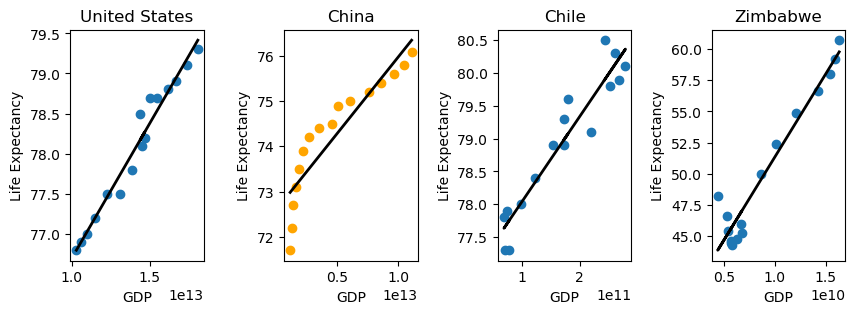

 
----------United States----------
                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     372.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.75e-11
Time:                        20:29:02   Log-Likelihood:                 7.2844
No. Observations:                  16   AIC:                            -10.57
Df Residuals:                      14   BIC:                            -9.024
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73

C:\Users\Hackstation\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Hackstation\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Hackstation\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Hackstation\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Figure size 640x480 with 0 Axes>

In [6]:

# gdp_without = gdp_df[gdp_df.country != 'Zimbabwe']
# china_life = gdp_df.life_expect[gdp_df.country == 'China']
# pop_life_mean = np.mean(gdp_df.life_expect)
# pop_gdp_mean = np.mean(gdp_df.gdp)
# china_life = np.array(china_life)

# pop_life_mean = np.mean(gdp_df.life_expect)
# pop_gdp_mean = np.mean(gdp_df.gdp)

# for country in country_list:
#     country_gdp = gdp_df.gdp[gdp_df.country == country]
#     country_life = gdp_df.life_expect[gdp_df.country == country]
#     t_stat1, pval1 = ttest_1samp(country_gdp, pop_gdp_mean)
#     t_stat2, pval2 = ttest_1samp(country_life, pop_life_mean)
    
#     print(country + ' GDP pvalue is ' + str(pval1))
#     print(country + ' Life expectancy pvalue is ' + str(pval2))
#     print(' ')


# model = sm.OLS.from_formula('life_expect~gdp', data = gdp_without)
# results = model.fit()
# print(results.params)

# plt.scatter(gdp_without.life_expect, gdp_without.gdp)
# plt.xlabel('Life Expectancy')
# plt.ylabel('GDP')

# X = gdp_without.life_expect.values.reshape(-1,1)
# y = gdp_without.gdp.values.reshape(-1,1)

# reg = LinearRegression()
# reg.fit(X, y)
# print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
# predictions = reg.predict(X)
# # y=(7.256685e+01 * gdp_df.gdp) + 3.420219e-13

# plt.plot(
#     gdp_without.life_expect,
#     predictions,
#     c='blue',
#     linewidth=2)

# # plt.plot(gdp_without.life_expect, y)
# plt.show()

# X = gdp_without.life_expect
# y = gdp_without.gdp

# X2 = sm.add_constant(X)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
# plt.clf 



                    # Null Hypothesis: Growth in GDP has no impact on Life expectancy

                        # Alt Hypothesis: Growth in GDP increases Life expectancy


# Create DataFrame for each country 

china_df = gdp_df[gdp_df.country == 'China']
chile_df = gdp_df[gdp_df.country == 'Chile']
zim_df = gdp_df[gdp_df.country == 'Zimbabwe']
us_df = gdp_df[gdp_df.country == 'United States of America']

fig, axs = plt.subplots(1, 4, figsize=(10, 3))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

# Creating a Simple Linear Regression Model for Zimbabwe's GDP and Life Expectancy

ax1.scatter(us_df.gdp, us_df.life_expect)
ax1.set_ylabel('Life Expectancy')
ax1.set_xlabel('GDP')
ax1.set_title('United States')

y = us_df.life_expect.values.reshape(-1,1)
X = us_df.gdp.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
predictions = reg.predict(X)

ax1.plot(
    us_df.gdp,
    predictions,
    c='black',
    linewidth=2)

plt.subplots_adjust(wspace=0.6)  



# Creating a Simple Linear Regression Model for China's GDP and Life Expectancy

ax2.scatter(china_df.gdp, china_df.life_expect, color = 'orange')
ax2.set_ylabel('Life Expectancy')
ax2.set_xlabel('GDP')
ax2.set_title('China')


max_gdp = int(np.max(country_gdp.gdp))
min_gdp = int(np.min(country_gdp.gdp))
country_gdp_diff = max_gdp - min_gdp 
ytick_list = list(range(min_gdp, max_gdp + 1, int(country_gdp_diff / 5)))
ylabel_list = ['${:.3f}tn'.format(x/10**12) for x in ytick_list]


y = china_df.life_expect.values.reshape(-1,1)
X = china_df.gdp.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
predictions = reg.predict(X)

ax2.plot(
    china_df.gdp,
    predictions,
    c='black',
    linewidth=2)



# Creating a Simple Linear Regression Model for Chile's GDP and Life Expectancy

ax3.scatter(chile_df.gdp, chile_df.life_expect)
ax3.set_ylabel('Life Expectancy')
ax3.set_xlabel('GDP')
ax3.set_title('Chile')

y = chile_df.life_expect.values.reshape(-1,1)
X = chile_df.gdp.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
predictions = reg.predict(X)

ax3.plot(
    chile_df.gdp,
    predictions,
    c='black',
    linewidth=2)



# Creating a Simple Linear Regression Model for Zimbabwe's GDP and Life Expectancy

ax4.scatter(zim_df.gdp, zim_df.life_expect)
ax4.set_ylabel('Life Expectancy')
ax4.set_xlabel('GDP')
ax4.set_title('Zimbabwe')

y = zim_df.life_expect.values.reshape(-1,1)
X = zim_df.gdp.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
predictions = reg.predict(X)

ax4.plot(
    zim_df.gdp,
    predictions,
    c='black',
    linewidth=2)

plt.subplots_adjust(wspace=0.6)  
plt.show()
plt.clf()


# Assess relevance of model
Xus = us_df.gdp
yus = us_df.life_expect

X2 = sm.add_constant(Xus)
est = sm.OLS(yus, X2)
est2 = est.fit()
print(' ')
print('----------United States----------')
print(est2.summary())
print(' ')


Xchina = china_df.gdp
ychina = china_df.life_expect

X2 = sm.add_constant(Xchina)
est = sm.OLS(ychina, X2)
est2 = est.fit()
print(' ')
print('----------China----------')
print(est2.summary())
print(' ')

Xchile = chile_df.gdp
ychile = chile_df.life_expect

X2 = sm.add_constant(Xchile)
est = sm.OLS(ychile, X2)
est1 = sm.formula.ols('life_expect ~ gdp', data=chile_df)
est2 = est.fit()
est3 = est1.fit()
print(' ')
print('----------Chile----------')
print(est2.summary())
# print(est3.summary())
print(' ')

Xzim = zim_df.gdp
yzim = zim_df.life_expect

X2 = sm.add_constant(Xzim)
est = sm.OLS(yzim, X2)
est2 = est.fit()
print(' ')
print('----------Zimbabwe----------')
print(est2.summary())
print(' ')

# def calculate_vif(dataset):
#     vif = pd.DataFrame()
#     vif['features'] = dataset.columns
#     vif['VIF_Value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    
# features = gdp_df.iloc[:, (gdp_df.columns != 'life_expect') | (gdp_df.columns != 'country' )]
# print(features.head())
# calculate_vif(features)